In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tensorflow as tf
import numpy as np
#import scipy.special as sci
import matplotlib.pyplot as plt
import pickle#5 as pickle|
from pylab import *

In [12]:
def neural_net(X, weights, biases):
    num_layers = len(weights) + 1  
    H=X
#    H = 2.0*(X -  X.min(0))/( X.max(0) -  X.min(0)) - 1.0
    for l in range(0,num_layers-2):
        W = weights[l]
        b = biases[l]
        H = np.tanh(np.add(np.matmul(H, W), b))
    W = weights[-1]
    b = biases[-1]
    Y =   np.add(np.matmul(H, W), b)
    return Y

In [13]:
t0=0
t1=100
Nt=1000
dt=(t1-t0)/Nt
vect=np.linspace(t0,t1,Nt+1)[:,None]
vect_tf = tf.cast(vect,dtype=tf.float32)


In [14]:
data=pickle.load(open('./result/hyper200000.pkl', 'rb'))
weights_phi1_14w=data['weights_phi1'] 
biases_phi1_14w=data['biases_phi1'] 
weights_phi2_14w=data['weights_phi2'] 
biases_phi2_14w=data['biases_phi2'] 
phi1_14w= neural_net(vect, weights_phi1_14w, biases_phi1_14w)
phi2_14w= neural_net(vect, weights_phi2_14w, biases_phi2_14w)

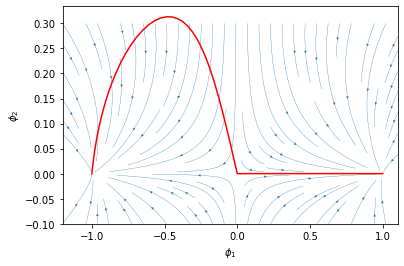

In [16]:
alpha=1.5
fig=  plt.figure()

x,y= meshgrid(arange(-1.2, 1.2, 0.1), arange(-0.1, 0.4, 0.1))
gamma=10
xdot = -(x**3-x+gamma*x*y**2)
ydot = -(y+x**2*y)
streamplot(x,y, xdot, ydot,linewidth=0.3,arrowsize=0.5)

plt.plot(phi1_14w,phi2_14w,'r',label='$\phi$')
plt.xlabel('$\phi_1$')
plt.ylabel('$\phi_2$')

#plt.legend()
plt.show()
fig.savefig('2d_phi_levy.png')

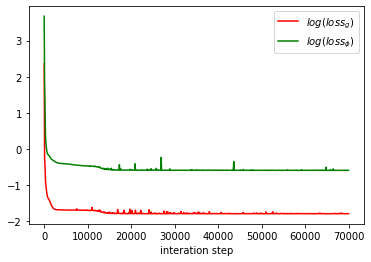

In [17]:
loss_g_record=np.loadtxt('./result/loss_g-mat.txt')
loss_phi_record=np.loadtxt('./result/loss_phi-mat.txt')
a=7
inter=np.linspace(0,a*10000,a*100+1)
fig=  plt.figure()
plt.plot(inter,np.log(loss_g_record[:a*100+1])/np.log(10),'r', label='$log(loss_g)$' ) 
plt.plot(inter,np.log(loss_phi_record[:a*100+1])/np.log(10),'g', label='$log(loss_{\phi})$')
plt.xlabel('interation step')
#plt.ylabel('$\phi$')
plt.legend()
plt.show()
fig.savefig('2d_phi_levy_loss.png')

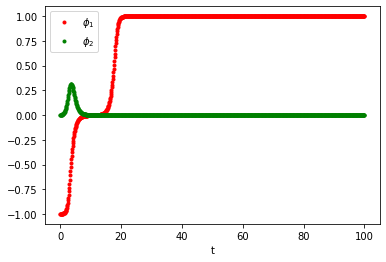

In [18]:
alpha=1.01
fig=  plt.figure()
plt.plot(vect,phi1_14w,'r.',label='$\phi_1$')
plt.plot(vect,phi2_14w,'g.',label='$\phi_2$')
plt.xlabel('t')
#plt.ylabel('$\phi_2$')
plt.legend()
plt.show()
fig.savefig('2d_phi_levy_time.png')